<a href="https://colab.research.google.com/github/pquynhvu/TDA/blob/main/mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np  # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.initializers import Constant
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau
keras.layers.Layer.weights
import seaborn as sns
from sklearn.metrics import confusion_matrix
from scipy.signal import convolve2d

In [3]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
class_labels = list(set(y_train))
# add color channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# normalize
x_train, x_test = x_train/255.0, x_test/255.0
# one-hot encoding
label_train, label_test = to_categorical(y_train), to_categorical(y_test)

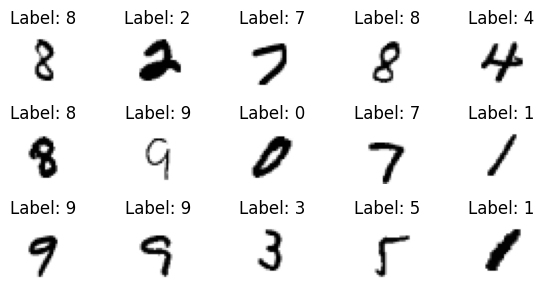

In [4]:
num_row, num_col = 3, 5

idx_10 = np.random.randint(low=0, high=x_train.shape[0], size=(num_row*num_col,))
x_train_10, y_train_10 = x_train[idx_10], y_train[idx_10]

# visualize
fig, axs = plt.subplots(num_row, num_col, figsize=(6, 3))
for i, ax in enumerate(axs.flatten()):
    ax.set_title(('Label: {}'.format(y_train_10[i])))
    ax.imshow(x_train_10[i], cmap=plt.cm.binary)
    ax.axis('off')
plt.tight_layout()
plt.show()

Ref: https://cs231n.github.io/convolutional-networks/ for number of padding/dimension

In [5]:
num_filter = [2, 1]
iter = 10000
bias = np.random.normal(loc=0.0, scale=1.0, size=len(num_filter))

mnist_cnn = models.Sequential() # initialize model
mnist_cnn.add(Conv2D(filters = num_filter[0],
                     kernel_size = (3,3),
                     padding = 'same',
                     strides=(1,1),
                     bias_initializer=Constant(bias[0]),
                     activation="sigmoid",
                     input_shape = (28,28,1)))
mnist_cnn.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
mnist_cnn.add(Conv2D(filters = num_filter[1],
                     kernel_size = (2,2),
                     padding = 'Same',
                     strides=(1,1),
                     bias_initializer=Constant(bias[1]),
                     activation ='sigmoid'))
mnist_cnn.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) # strides = (1,1)
mnist_cnn.add(Flatten())
mnist_cnn.add(Dense(10, activation = "softmax"))
mnist_cnn.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# CNN

In [6]:
mnist_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 2)           │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 2)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 1)           │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 169)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           1,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,729 (6.75 KB)

 Trainable params: 1,729 (6.75 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
mnist_cnn_fit = mnist_cnn.fit(x_train, label_train, epochs = 100, batch_size = 250)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - accuracy: 0.1126 - loss: 2.3206
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - accuracy: 0.1150 - loss: 2.3002
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.1134 - loss: 2.3001
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - accuracy: 0.1141 - loss: 2.2994
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.1240 - loss: 2.2981
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.1149 - loss: 2.2975
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.1354 - loss: 2.2973
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.1239 - loss: 2.2961
Epoch 9/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.1321 - loss: 2.2946
Epoch 10/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - accuracy: 0.1200 - loss: 2.2928
Epoch 11/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.1521 - loss: 2.2916
Epoch 12/100
240/24

In [8]:
layer_names = [layer.name for layer in mnist_cnn.layers]
layer_names

['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense']

In [9]:
conv1_W, conv1_b = mnist_cnn.layers[layer_names.index('conv2d')].get_weights()
conv2_W, conv2_b = mnist_cnn.layers[layer_names.index('conv2d_1')].get_weights()
dense_W, dense_b = mnist_cnn.layers[layer_names.index('dense')].get_weights()

In [10]:
def same_padding(images, filter_h, filter_w, stride):
    sample_size, img_h, img_w, _ = images.shape
    stride_h, stride_w = stride

    pad_h = ((stride_h-1)*img_h + filter_h - stride_h) // 2
    pad_w = ((stride_w-1)*img_w + filter_w - stride_w) // 2

    output = []
    for n in range(sample_size):
      padded_img = np.pad(images[n,:,:,:], ((pad_h, pad_h), (pad_w, pad_w), (0,0)), mode='constant', constant_values=0)
      output.append(padded_img)

    return np.array(output)

In [11]:
def get_start_index(output_height, output_width, stride_height, stride_width, kernel_height, kernel_width):
    h_start, h_end, w_start, w_end = [], [], [], []
    i, j = 0, 0

    while i <= output_height and j <= output_width:
        h_start_value = i*stride_height
        h_end_value = h_start_value + kernel_height
        w_start_value = j*stride_width
        w_end_value = w_start_value + kernel_width
        if h_end_value <= output_height or w_end_value <= output_width:
           h_start.append(h_start_value)
           #h_end.append(h_end_value)
           w_start.append(w_start_value)
           #w_end.append(w_end_value)
        i+=1
        j+=1
    return h_start, w_start

In [12]:
def reLU(images):
  return np.maximum(0, images)

def sigmoid(images):
	return 1.0 / (1.0 + np.exp(-images))

def softmax(images):
  sample_size, num_classes = images.shape
  max_idx = []

  for n in range(sample_size):
    exp_x = np.exp(images[n] - np.max(images[n]))
    p = exp_x/exp_x.sum()
    max_idx.append(np.argmax(p))
  return np.array(max_idx)

In [13]:
def Convo2D(images, filters, stride, bias, padding):
    filter_h, filter_w, in_channels, out_channels = filters.shape

    if padding:
      img_padded = same_padding(images, filter_h, filter_w, stride)
    else:
      img_padded = images

    sample_size, input_h, input_w, channels = img_padded.shape
    stride_h, stride_w = stride
    output_h = input_h - filter_h + 1
    output_w = input_w - filter_w + 1
    convo_img = np.empty((sample_size, output_h, output_w, out_channels))

    for i in range(output_w):
        for j in range(output_h):
            h_start_idx = i*stride_h
            w_start_idx = j*stride_w
            sub_img = img_padded[:, h_start_idx:(h_start_idx+filter_h), w_start_idx:(w_start_idx+filter_w)]

            for f in range(out_channels):
                res = np.sum(sub_img * filters[:,:,:, f], axis=(1, 2, 3)) + bias[f]
                convo_img[:, i, j, f] = res

    return sigmoid(convo_img)

In [14]:
def max_pooling(images, pool_size, stride):
    sample_size, input_h, input_w, channels = images.shape
    kernel_h, kernel_w = pool_size
    stride_h, stride_w = stride

    output_w = (input_w - kernel_w) // stride_w + 1
    output_h = (input_h - kernel_h) // stride_h + 1
    pooled_img = np.empty((sample_size, output_h, output_w, channels))

    for n in range(sample_size):
        sub_img = images[n]
        for c in range(channels):
          for i in range(output_h):
            for j in range(output_w):
                h_start_idx = i*stride_h
                w_start_idx = j*stride_w
                subsection = sub_img[h_start_idx:(h_start_idx+kernel_h), w_start_idx:(w_start_idx+kernel_w), c]
                pooled_img[n, i, j, c] = np.max(subsection)

    return pooled_img

In [15]:
def dense_layer(images, weights, bias):
  sample_size = images.shape[0]
  img_flattened = images.reshape(sample_size, -1)
  output = np.dot(img_flattened, weights) + bias
  return output

In [16]:
convo1_out = Convo2D(x_test, filters=conv1_W, stride=(1,1), bias = conv1_b, padding=True)
convo1_maxpool = max_pooling(convo1_out, pool_size=(2,2), stride=(1,1))
convo2_out = Convo2D(convo1_maxpool, filters=conv2_W, stride=(1,1), bias = conv2_b, padding=True)
convo2_maxpool = max_pooling(convo2_out, pool_size=(2,2), stride=(2,2))
dense_out = dense_layer(convo2_maxpool, weights=dense_W, bias=dense_b)
pred_classes = softmax(dense_out)

In [17]:
np.mean(pred_classes == y_test)

np.float64(0.9031)

In [18]:
def plot_images(data, predicted_labels, true_labels, nrows=0, images_per_row=0, wspace=0.3, hspace=0.3):
    fig, axes = plt.subplots(nrows, images_per_row, figsize=(7, 4))
    axes = axes.ravel()

    for idx in range(nrows * images_per_row):
        ax = axes[idx]
        image = data[idx]
        ax.imshow(image, cmap=plt.cm.binary)
        ax.set_title(f"Predicted {predicted_labels[idx]} - True {true_labels[idx]}")
        ax.axis('off')

    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    plt.tight_layout()
    plt.show()

[7 2 1 0 4 9 5 6 3 8] [7 2 1 0 4 9 6 6 3 8]


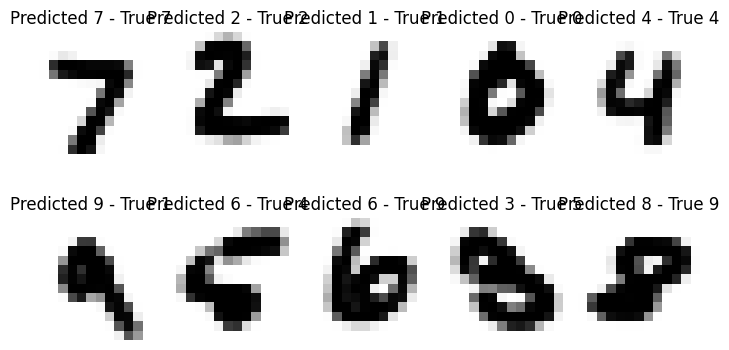

In [19]:
first_indices = {}
for i, val in enumerate(y_test):
    if val not in first_indices:
        first_indices[val] = i

idx = np.array(list(first_indices.values()))
print(y_test[idx], pred_classes[idx])

x_cnn_sampled = convo2_maxpool[idx]
pred_label = pred_classes[idx]
plot_images(x_cnn_sampled, pred_label, y_test, 2, 5, wspace=100, hspace=10)

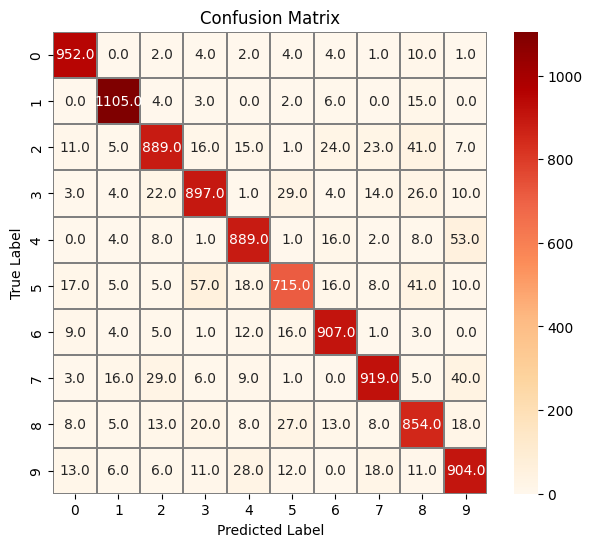

In [20]:
cm = confusion_matrix(y_test, pred_classes)
f,ax = plt.subplots(figsize=(7, 6))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="OrRd",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# TDA

In [21]:
!pip install gudhi
import gudhi as gd
from collections import defaultdict
from joblib import Parallel, delayed

In [22]:
cnn_img = convo2_maxpool.squeeze()
n = cnn_img.shape[0]

pers = []
for i in range(n):
    cubical_complex = gd.CubicalComplex(top_dimensional_cells=cnn_img[i])
    cubical_pers = cubical_complex.persistence()
    pers.append(cubical_pers)

/usr/local/lib/python3.11/dist-packages/gudhi/persistence_graphical_tools.py:129: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


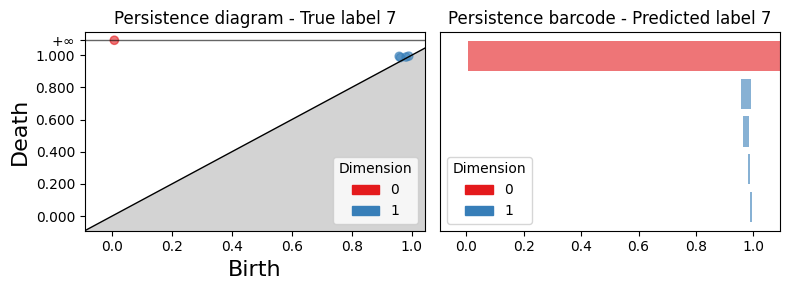

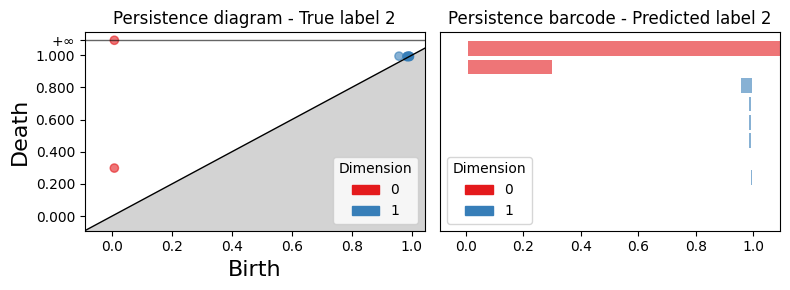

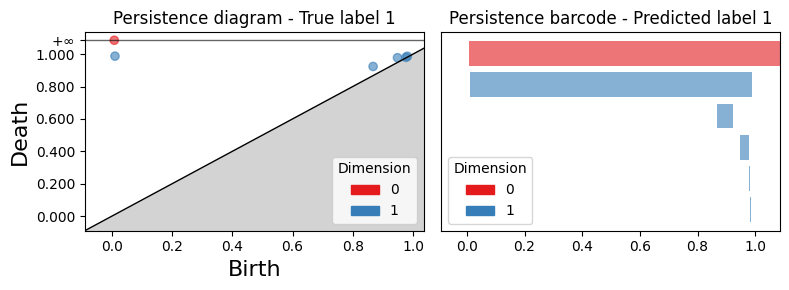

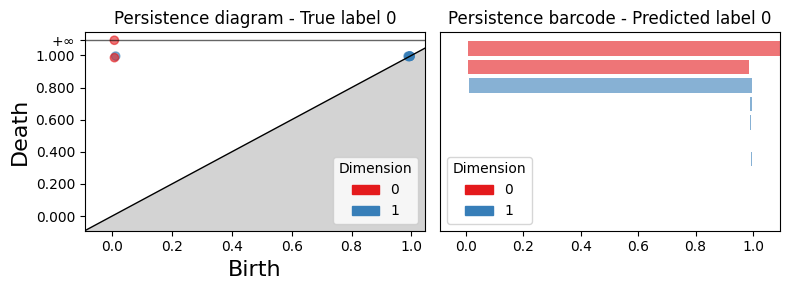

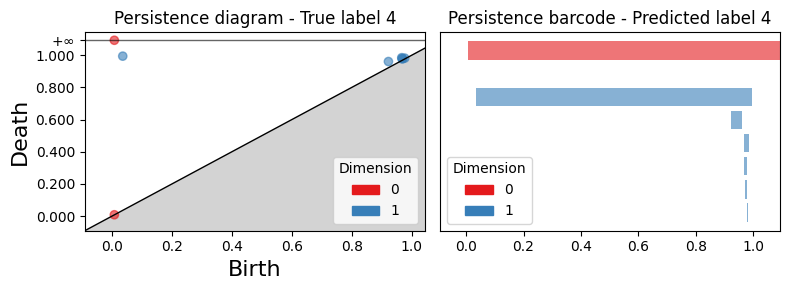

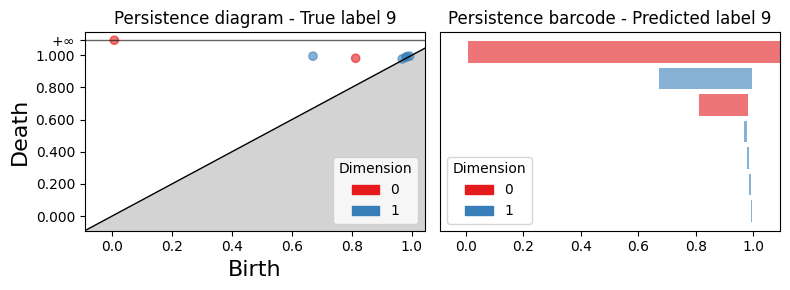

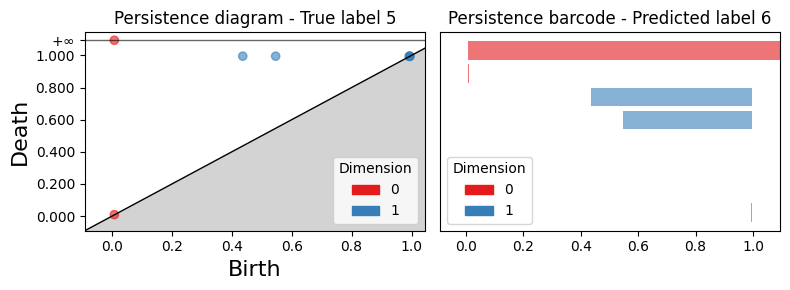

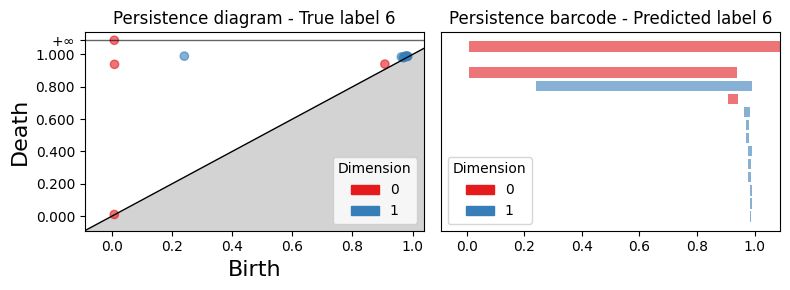

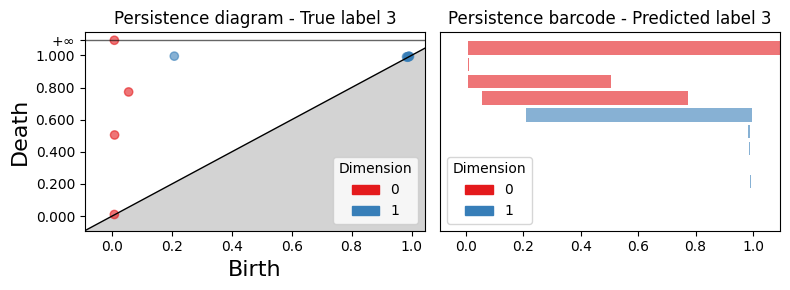

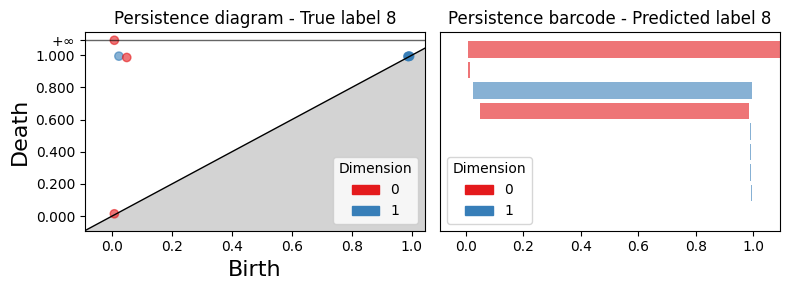

In [23]:
num_row, img_per_row = 10, 2
for i in range(num_row):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

    gd.plot_persistence_diagram(persistence=pers[idx[i]], axes=axes[0])
    axes[0].set_title(f'Persistence diagram - True label {y_test[idx[i]]}')

    gd.plot_persistence_barcode(persistence=pers[idx[i]], axes=axes[1])
    axes[1].set_title(f'Persistence barcode - Predicted label {pred_classes[idx[i]]}')

    plt.tight_layout()
    plt.show()

In [24]:
def sort_and_group(labels, pers_data):
    grouped_pers_data = defaultdict(list)

    for y, d in zip(labels, pers_data):
        grouped_pers_data[y].append(d)

    sorted_grouped_pers_data = sorted(grouped_pers_data.items())

    sorted_labels = []
    sorted_pers_data = []

    for y_val, grouped_lists in sorted_grouped_pers_data:
        for sublist in grouped_lists:
            sorted_labels.append(y_val)
            sorted_pers_data.append(sublist)

    return np.array(sorted_labels), sorted_pers_data

In [25]:
sorted_y_test, sorted_pers = sort_and_group(y_test, pers)
unique_labels = np.unique(y_test)

In [40]:
sample_size_per_label = 250
selected_idx = []

for label in unique_labels:
    indices = np.where(sorted_y_test == label)[0]
    selected_idx.extend(indices[:sample_size_per_label])

selected_indices = np.array(selected_idx, dtype=int)
selected_labels = sorted_y_test[selected_indices]

In [41]:
def get_persistence_pairs(data_sets):
    H0_list = []  # List to store H0 pairs per image
    H1_list = []  # List to store H1 pairs per image

    for data in data_sets:
        H0_list.append([(birth, death) for dim, (birth, death) in data if dim == 0])
        H1_list.append([(birth, death) for dim, (birth, death) in data if dim == 1])

    return H0_list, H1_list

In [42]:
H0_list, H1_list = get_persistence_pairs(sorted_pers)
H0_sublist, H1_sublist = [], []

for i in selected_indices:
  H0_sublist.append(H0_list[i])
  H1_sublist.append(H1_list[i])

In [63]:
def bottleneck_distance(pers_data):
  size = len(pers_data)
  B = np.zeros((size, size))
  for i in range(size):
    for j in range(i+1, size):
        B[i,j] = gd.bottleneck_distance(pers_data[i], pers_data[j])
  B = B + B.transpose()
  return B

In [64]:
B0 = bottleneck_distance(H0_sublist)

In [44]:
B0 = bottleneck_distance(H0_sublist)
B1 = bottleneck_distance(H1_sublist)

In [45]:
def plot_distance_matrix(matrix, title="Distance Matrix", labels=None):
    plt.figure(figsize=(8,6))
    if labels is not None:
        sns.heatmap(matrix, annot=False, fmt=".2f", xticklabels=labels, yticklabels=labels, cmap="viridis")
    else:
        sns.heatmap(matrix, annot=False, fmt=".2f", cmap="viridis")
    plt.title(title)
    plt.xlabel("Samples")
    plt.ylabel("Samples")
    plt.show()

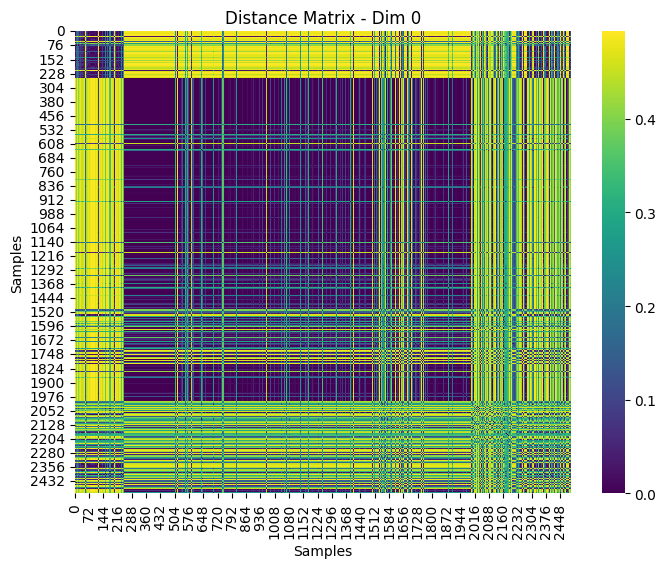

In [69]:
plot_distance_matrix(B0, title="Distance Matrix - Dim 0", labels=None)

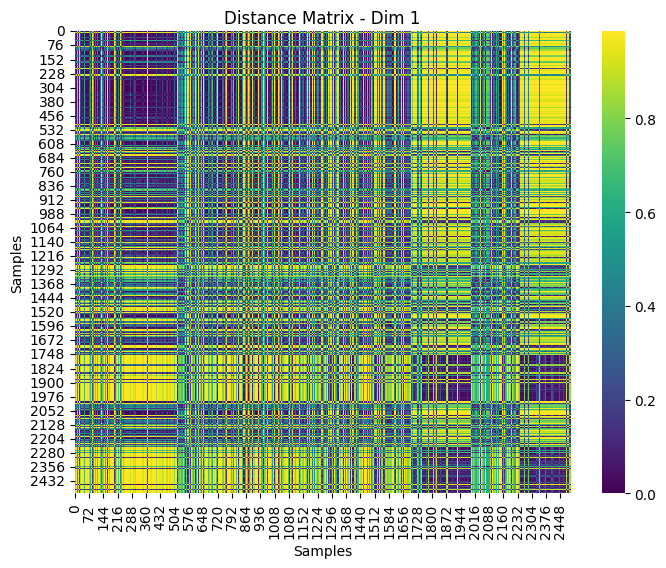

In [47]:
plot_distance_matrix(B1, title="Distance Matrix - Dim 1", labels=None)

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

def hierarchical_clustering_from_distance_matrix(distance_matrix, method='ward', metric='euclidean', labels=None, title='Hierarchical Clustering Dendrogram'):


    # Ensure the distance matrix is a NumPy array
    distance_matrix = np.array(distance_matrix)

    # Check if the distance matrix is square and symmetric
    n = distance_matrix.shape[0]
    if distance_matrix.shape != (n, n):
        raise ValueError("Distance matrix must be square.")
    if not np.allclose(distance_matrix, distance_matrix.T):
        raise ValueError("Distance matrix must be symmetric.")
    if np.any(np.diag(distance_matrix) != 0):
        raise ValueError("Diagonal elements of the distance matrix should be zero.")
    if np.any(distance_matrix < 0):
        raise ValueError("Distance matrix should not contain negative values.")

    # Perform hierarchical clustering using the precomputed distance matrix
    linked = linkage(distance_matrix, method=method, metric=metric, optimal_ordering=True)

    # Plot the dendrogram
    plt.figure(figsize=(10, 6))
    dendrogram(linked,
               orientation='top',
               labels=labels,
               distance_sort='descending',
               show_leaf_counts=True)
    plt.title(title)
    plt.xlabel("Data Points" if labels else "Index")
    plt.ylabel("Distance")
    plt.tight_layout()
    plt.show()

hierarchical_clustering_from_distance_matrix(B0, method='ward', metric='euclidean', labels=None, title='Hierarchical Clustering Dendrogram')

<ipython-input-71-91318a4ed81a>:22: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(distance_matrix, method=method, metric=metric, optimal_ordering=True)


In [ ]:
!pip install nibabel
import nibabel